# Examples for IGM $f(N)$ models (v2.1)

In [1]:
# 2022-09-06 JXP

In [1]:
%matplotlib inline

In [18]:
# imports
from importlib import reload

try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

import time
import numpy as np

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

from matplotlib import pyplot as plt

output_notebook()

from linetools.spectra.xspectrum1d import XSpectrum1D

from pyigm.fN.fnmodel import FNModel
from pyigm.fN import tau_eff as teff

Loading BokehJS ...

## Instantiate

### Inoue+14 model

In [3]:
fN_I14 = FNModel('Gamma')

In [4]:
fN_I14.zmnx

(0.0, 10.0)

### Default (Hspline from Prochaska+14)

In [5]:
fN_default = FNModel.default_model()

Using P14 spline values to generate a default model
Loading: /data/Projects/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz


In [6]:
fN_default

<FNModel: Hspline zmnx=(0.5,3) zpivot=2.4, gamma=1.5>

## Calculate $\ell(X)$

In [7]:
fN_default = FNModel.default_model()
lX = fN_default.calculate_lox(2.4, 17.19+np.log10(2.), 23.) 
print('l(X) = {:g}'.format(lX))

Using P14 spline values to generate a default model
Loading: /data/Projects/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz
l(X) = 0.362987


## Calculate $\tau_{\rm eff}^{\rm LL}$

In [8]:
fN_default = FNModel.default_model()
zval,teff_LL = teff.lyman_limit(fN_default, 0.5, 2.45)

Using P14 spline values to generate a default model
Loading: /data/Projects/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz


In [9]:
zval[0], teff_LL[0]

(0.5, 1.842987569598177)

### Plot

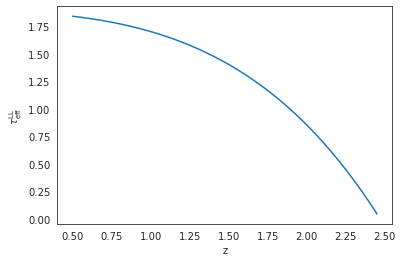

In [12]:
plt.clf()
plt.plot(zval,teff_LL)
# 
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}^{\rm LL}$')
plt.show()

## $\lambda_{\rm 912}^{\rm mfp}$

In [11]:
z = 2.44
mfp = fN_default.mfp(z)
mfp

<Quantity 257.10258545808983 Mpc>

## $\rho_{\rm HI}$

In [12]:
# Evaluate
rho_HI = fN_default.calculate_rhoHI(z, (20.3, 22.))
print('rho_HI = {:g}'.format(rho_HI))

rho_HI = 8.35538e+07 solMass / Mpc3


## DM (Dispersion Measure)

This is trivial and does not depend on $f(N)$ for now.

In [13]:
reload(teff)
DM = teff.DM(1.)
print(DM)

Using a Planck15 cosmology with H0=67.74 km / (Mpc s) and Om=0.3075 and Ob=0.0486
1235.87279603 pc / cm3


## $\tau_{\rm eff}^{\rm Lyman}$

### Need an EW spline

In [14]:
from pyigm import utils as pyigmu

In [15]:
pyigmu.mk_ew_lyman_spline(24., 'EW_SPLINE_b24.yml')

line = 912.703 Angstrom
line = 912.768 Angstrom
line = 912.839 Angstrom
line = 912.918 Angstrom
line = 913.006 Angstrom
line = 913.104 Angstrom
line = 913.215 Angstrom
line = 913.339 Angstrom
line = 913.48 Angstrom
line = 913.641 Angstrom
line = 913.826 Angstrom
line = 914.038 Angstrom
line = 914.286 Angstrom
line = 914.576 Angstrom
line = 914.919 Angstrom
line = 915.329 Angstrom
line = 915.824 Angstrom
line = 916.429 Angstrom
line = 917.181 Angstrom
line = 918.129 Angstrom
line = 919.351 Angstrom
line = 920.963 Angstrom
line = 923.15 Angstrom
line = 926.226 Angstrom
line = 930.748 Angstrom
line = 937.803 Angstrom
line = 949.743 Angstrom
line = 972.537 Angstrom
line = 1025.72 Angstrom
line = 1215.67 Angstrom
Writing EW_SPLINE_b24.yml


/Users/xavier/anaconda/lib/python2.7/site-packages/yaml/representer.py:142: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data in [None, ()]:


### Evaluate

In [16]:
fN_model = FNModel.default_model()
# tau_eff
reload(teff)
lamb = 1215.6701*(1+2.4)
lya_teff = teff.lyman_ew(lamb, 2.5, fN_model, NHI_MIN=12., NHI_MAX=17.)
print('teff(Lya) = {:g}'.format(lya_teff))

Using P14 spline values to generate a default model
Loading: /Users/xavier/local/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz
teff(Lya) = 0.198183


### The Sawtooth (with parallelization)

In [19]:
import multiprocessing
from linetools.lists.linelist import LineList
import copy
HI = LineList('HI')
tst_wv = HI._data['wrest']
    
# f(N)
fN_model = FNModel.default_model()
# Evaluations
saw_wv = np.linspace(910., 1220., num=1000)*u.AA
#
adict = []
for wrest in saw_wv:
    tdict = dict(ilambda=wrest.value*(1+2.4), zem=2.5, fN_model=fN_model,
                wrest=copy.deepcopy(tst_wv))
    adict.append(tdict)

print(time.asctime( time.localtime(time.time()) ))
pool = multiprocessing.Pool(4) # initialize thread pool N threads
ateff = pool.map(teff.map_lymanew, adict)
print(time.asctime( time.localtime(time.time()) ))

Using P14 spline values to generate a default model
Loading: /Users/xavier/local/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz
Wed Mar 30 13:31:06 2016
Wed Mar 30 13:32:32 2016


In [21]:
# Lya
p = figure(plot_width=500, plot_height=400, title='Sawtooth (z=2.5)')
# Data
p.line(saw_wv.value, np.exp(-1*np.array(ateff)), color='black', line_width=2)
# Labels
p.xaxis.axis_label = "Rest Wavelength"
p.yaxis.axis_label = "Transmission"
# Show
p.set(x_range=Range1d(900,1230), y_range=Range1d(0.,1))
show(p)

## Mocks

In [20]:
from pyigm.fN import mockforest as pyimock

In [22]:
# Quasar
zem = 2.5

In [23]:
# Spectral properties
s2n = 10.
sampling = 2.
R = 2000.

In [24]:
# Resultant wavelength array (using constant dwv instead of constant dv)
disp = 4000/R/sampling # Angstrom
wave = np.arange(3800., 1300*(1+zem), disp)*u.AA

In [25]:
mock_spec, HI_comps, _ = pyimock.mk_mock(wave, zem, fN_model, s2n=s2n, fwhm=sampling)

Using a Flat LCDM cosmology: h=0.7, Om=0.3


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:92: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


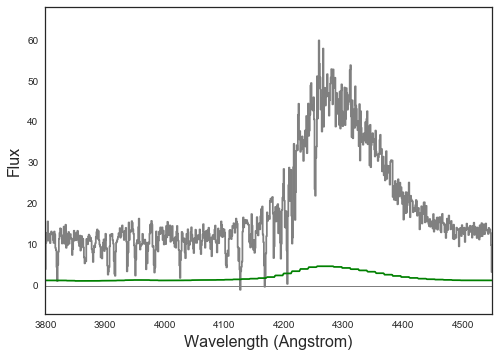

In [26]:
mock_spec.plot()

----